In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
# A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
# 1 0 1
# 0 1 0
#...
A = np.zeros((6,3))
A[::2, ::2] = 1 # четные строки и по четным строкам четные элементы зполняем 1
A[1::2, 1::2] = 1 #

#В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
B = np.arange(1,25).reshape((6,4))
# 1 2 3 4
# 8 7 6 5
B[1::2] = B[1::2][:,::-1]

# C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
C = np.random.randint(2,11, size = (4,3)) # бутстрепированная выборка

# D - из нулей с единичками на главной диагонали, размера 4 на 4.
D = np.eye(4)

In [ ]:
#Создайте из этих матриц "лоскутную" матрицу S

#A В

#С D
# Stack
AB = np.hstack((A,B))
CD = np.hstack((C,D))

S = np.vstack((AB,CD))

In [ ]:
# После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

# S F

F = np.zeros((10,2))
G = np.hstack((S, F))

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
X = np.arange(0,16).reshape((4, 4))
a = 14.5
# а если расстояние одинаково до двух чисел матрицы, то какое число выводить?
# я вывел первое после вытягивания во flatten()

def find_nearest_neighbour(X, a):
  # операцию бродкастинга
  distances = (np.abs(X-a))**2
  print(distances)
  # используем flatten()
  return X.flatten()[np.argmin(distances)]

find_nearest_neighbour(X, a)

[[210.25 182.25 156.25 132.25]
 [110.25  90.25  72.25  56.25]
 [ 42.25  30.25  20.25  12.25]
 [  6.25   2.25   0.25   0.25]]


14

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
# Придумайте свои данные для примера, N >= 4
A = np.array([[0.0, 1.0, 2.0, 3.0],
               [4.0, 5.0, 6.0, 7.0],
               [8.0, 9.0, 10.0, 11.0],
               [12.0, 13.0, 14.0, 15.0]])
b = np.array([0.0, 2.0, -1.0, 6.8])
X = np.array([2.0, -4.2, 6.0, 7.1])

def very_strange_neural_network(A,b, X):
  # Возводить матрицу A (матрицу весов) размера N x N в квадрат
  sq_A = A**2
  # умножать вектор X длины N (вектор признаков) на матрицу весов A**2
  vec = np.dot(X, sq_A)
  return vec, np.dot(vec, b)

print(very_strange_neural_network(A,b, X))


(array([1339.2, 1582.9, 1848.4, 2135.7]), 15840.159999999998)


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
def find_deep_sea_area(M):
  return np.sum(M<-5)

def find_water_volume(M):
  return np.abs(np.sum(M[M<0]))


def find_max_height(M):
  if np.max(M)<0:
    return "У нас нет суши:("
  else:
    return np.max(M)

In [ ]:
#Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])


# простая проверка для примера выше
#assert np.isclose(find_deep_sea_area(M), 1)
#assert np.isclose(find_water_volume(M), 21)
#assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
  a = np.concatenate(([0], a))
  diff_a = np.diff(a)
  return np.sum(diff_a==1)

In [ ]:
# можно подставить свой пример
a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
def swap_mask_for_average(X, a):
    mean_matrix_val = np.mean(M)
    print(mean_matrix_val)
    mask = X > a
    X[mask] = mean_matrix_val
    print(X)

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7., -3., -1., 0.],
    [-4., -3., 1., 19.],
    [-2., 0., 4., 25.],
    [-1., 3., 6., 9.]
])
a = 5.

# простая проверка для примера выше
# assert np.allclose(swap_mask_for_average(M, a),
#                    np.array([
#           [-7., -3., -1., 0.],
#           [-4., -3., 1., 19.],
#           [-2., 0., 4., 25.],
#           [-1., 3., 6., 9.]
#       ]))

swap_mask_for_average(M, a)

2.875
[[-7.    -3.    -1.     0.   ]
 [-4.    -3.     1.     2.875]
 [-2.     0.     4.     2.875]
 [-1.     3.     2.875  2.875]]


## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
    summa_main = np.trace(M)
    summa_pob = np.trace(np.fliplr(M))
    return summa_main - summa_pob

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    # мы создаем вектор обратный данном и контатенируем его с исходным
    a_reverse = a[::-1]
    a = np.concatenate([a, a_reverse])
    # нужно создать два вектора один со скобками а второй ось новую вставить в другое измерение
    return a[np.newaxis,:] + a[:, np.newaxis]



In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
def custom_blur(P, C):
  N,M = P.shape
  blur_image = np.zeros((N-C+1, M-C+1))

  for i in range(N-C+1):
    for j in range(M-C+1):
      little_mat = P[i:i+C,j:j+C]
      blur_image[i,j] = np.mean(little_mat)
  return blur_image

In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
def check_successful_broadcast(*matrices):
  matrices = [list(mat) for mat in matrices]
  #  Дополнить все матрицы до матрицы самой большой размерности
  # выбрать матрицу с большой размерностью
  max_len_matrix = max(len(mat) for mat in matrices)
  # теперь дополняем если размер матрицы меньше max_len_matrix
  for i in range(len(matrices)):
    while len(matrices[i]) < max_len_matrix:
      matrices[i].insert(0,1) # обавляем в текущую рассматрвиаемую матрицу по индексу 0 число 1
  for mat in zip(*matrices):
    for i in range(1, len(mat)):
      if mat[i]!=mat[0] and mat[i]!=1:
        return False

  return True


In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
    # попарное расстояние  - это евклидово
    return np.sqrt(((A[:, np.newaxis]-B)**2).sum(axis = 2))


In [ ]:
A = np.array([[1,2],
     [3,4],
     [5,6]])
B = np.array([[7,8],
     [9,10]])

pairwise_distances(A, B)

array([[ 8.48528137, 11.3137085 ],
       [ 5.65685425,  8.48528137],
       [ 2.82842712,  5.65685425]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'>  Мы добавили в матрицу A второе измерение 1, для того. чтобы была возможность
применить операцию бродкастинга и тогда имеем:
(3,1,2) и (2,2) после расширения второй матрицы имеем:
(3,1,2) и (1,2,2)-> операция бродкастинга возможна
 далее мы вычисляем евклидово расстоние между элементами первой матрицы и второй, например (1,2) и (7,8)
 получаем np.sqrt((1-7)^2 + (2-8)^2) =~8,48.
Далее берем (1,2) и (9,10) и, делая то же самое, получаем число и вставляем его как новый элемент матрицы по индексам (0,1).
 Аналогично выполняем для всех пар в матрице и получаем новую матрицу размерностью (3,2)
В строке функции это все выполняется сразу для всех пар в матрицах.
 </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

File "<ipython-input-2-f1e5cb00845d>", line 2







In [ ]:
from pandas import read_csv

In [ ]:
data = read_csv('/content/data_numpy_lab.csv')

In [ ]:
data

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17
5,6,3,235,1,216.0,108.0,0.17
6,7,3,226,1,216.0,108.0,0.15
7,8,3,234,1,216.0,108.0,0.16
8,9,3,229,1,216.0,108.0,0.16
9,10,3,230,1,216.0,108.0,0.18


In [ ]:

data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


In [ ]:
data.columns

Index(['Unnamed: 0', 'N', 't, sec', 'sigma_t, sec', 'mass, gramm',
       'length, cm', 'phi, rad'],
      dtype='object')

## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [ ]:

# переводим в колонке 'mass, gramm' из грамм в килограммы
data['mass, gramm'] = data['mass, gramm']/1000
# переводим в колонке 'length, cm' из см в м
data['length, cm'] = data['length, cm']/100


data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


In [ ]:
# Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.
data = data.rename(columns={'t, sec':'t','sigma_t, sec':'sigma_t','mass, gramm':'mass','length, cm':'length','phi, rad':'phi'})

In [ ]:
data.head()

,Unnamed: 0,N,t,sigma_t,mass,length,phi
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [ ]:
#Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:
data['omega'] = 2*np.pi*data['N']/data['t']
data['sigma_omega'] = (data['omega']/data['t'])*data['sigma_t']
data['omega_down'] = data['phi']/data['t']
data['sigma_down'] = data['sigma_t']/data['t']
g = 9.8 #м/с^2
data['momentum'] = data['mass']*g*data['length']
data['momentum_down'] = ((data['mass']*data['phi'])/(data['t'])**2)*(data['length'])**2
data['sigma_momentum'] = data['momentum_down']*2*data['sigma_t']/data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,Unnamed: 0,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.003731,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.003788,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.003636,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.003802,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.003745,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [ ]:
grouped_data = data.groupby('mass')[['omega','sigma_omega', 'momentum', 'momentum_down']].mean()
assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down
mass,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07
0.180,0.094012,0.000352,2.134440,6.202853e-07
0.216,0.081687,0.000354,2.286144,7.755223e-07
0.273,0.143300,0.000817,3.263988,2.166527e-06
0.341,0.150752,0.000723,3.675980,1.577406e-06
0.614,0.185194,0.000910,6.679092,3.030996e-06


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

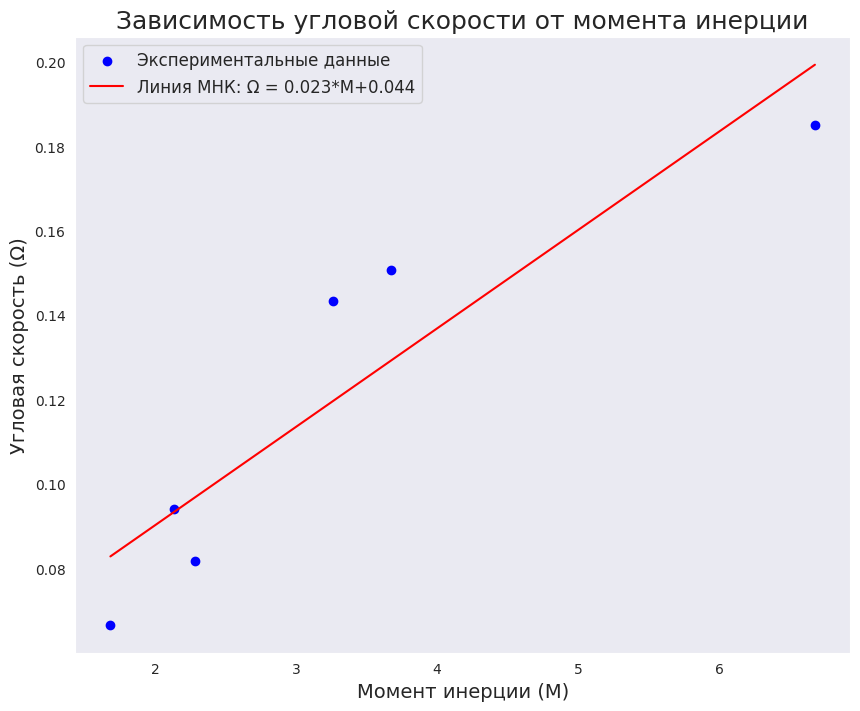

In [ ]:
# вычисленные данные с предыдущего примера
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# omega  = a*M+b
coefs, cov_matrix = np.polyfit(momentum_np, omega_np, 1, cov = True)

a = coefs[0]
b = coefs[1]

# теперь надо построить график точек эксперимента
# для построения прямой МНК сначала выведим точки по иксу
x_points = np.linspace(momentum_np.min(), momentum_np.max(), 100)
# теперь адаптируем подогнанную прямую под точки linspace
y_points = np.polyval(coefs, x_points)

figure = plt.figure(figsize = (10,8))
# строим экспериментальные точки
plt.scatter(momentum_np, omega_np, label='Экспериментальные данные', color='blue')
# строим линию метода наименьших квадратов
plt.plot(x_points, y_points, label=f'Линия МНК: Ω = {a:.3f}*M+{b:.3f}', color='red')
plt.xlabel('Момент инерции (M)', fontsize = 14)
plt.ylabel('Угловая скорость (Ω)', fontsize = 14)
plt.title('Зависимость угловой скорости от момента инерции', fontsize = 18)
plt.grid()

plt.legend(fontsize=12)
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [ ]:
data_great_pogr = data.copy()
grouped_data_pogr = data_great_pogr.groupby('mass')[['omega','sigma_omega', 'omega_down', 'momentum_down','sigma_down','sigma_momentum']].mean()

In [ ]:
grouped_data_pogr['sigma_down'] *= 10
grouped_data_pogr['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

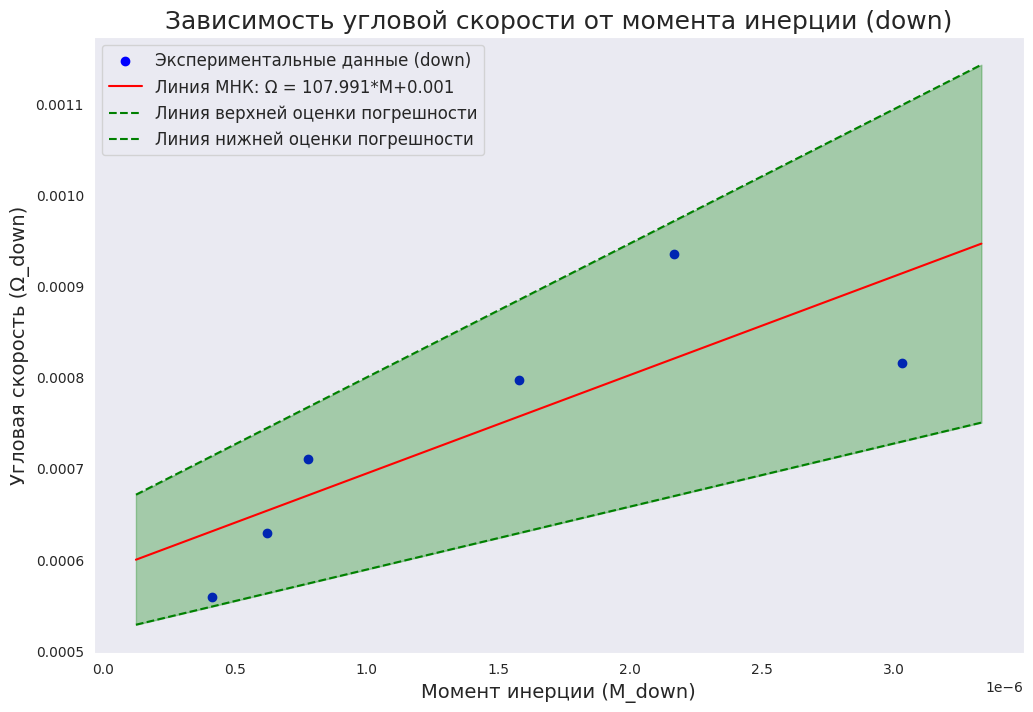

In [ ]:
omega_down_np = np.array(grouped_data_pogr.omega_down)
momentum_down_np = np.array(grouped_data_pogr.momentum_down)
sigma_down = np.array(grouped_data_pogr.sigma_down)
sigma_momentum = np.array(grouped_data_pogr.sigma_momentum)

coefs, cov_matrix = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

a = coefs[0]
b = coefs[1]
# погрешности для коэффициентов
sigma_a = np.sqrt(cov_matrix[0,0])
sigma_b = np.sqrt(cov_matrix[1,1])

# теперь надо построить график точек эксперимента
# для построения прямой МНК сначала выведим точки по иксу
x_points = np.linspace(momentum_down_np.min()*0.3, momentum_down_np.max()*1.1, 100)
# теперь адаптируем подогнанную прямую под точки linspace
y_points = np.polyval(coefs, x_points)

# Верхняя оценка погрешности
y_pogr_upper = (a+sigma_a)*x_points+(b+sigma_b)
# Нижняя оценка погрешности
y_pogr_lower = (a-sigma_a)*x_points+(b-sigma_b)

# строим графики всего
fig = plt.figure(figsize = (12,8))
#plt.errorbar(momentum_down_np, omega_down_np, xerr = sigma_momentum, yerr = sigma_down)
# строим экспериментальные точки
plt.scatter(momentum_down_np, omega_down_np, label='Экспериментальные данные (down)', color='blue')
# Линия МНК
plt.plot(x_points, y_points, label=f'Линия МНК: Ω = {a:.3f}*M+{b:.3f}', color='red')
# Линия верхней цоенки погрешности
plt.plot(x_points, y_pogr_upper, '--', label=f'Линия верхней оценки погрешности', color='green')
# Линия нижней оценки погрешности
plt.plot(x_points, y_pogr_lower, '--', label=f'Линия нижней оценки погрешности', color='green')
# Закрашиваем области между линиями погрешности
plt.fill_between(x_points, y_pogr_lower, y_pogr_upper, color='green', alpha=0.3)

plt.xlabel('Момент инерции (M_down)', fontsize = 14)
plt.ylabel('Угловая скорость (Ω_down)', fontsize = 14)
plt.title('Зависимость угловой скорости от момента инерции (down)', fontsize = 18)
plt.grid()

plt.legend(fontsize=12)
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [ ]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv
iris = pd.read_csv('/content/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

iris = iris.drop('Id', axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
iris['Species'].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

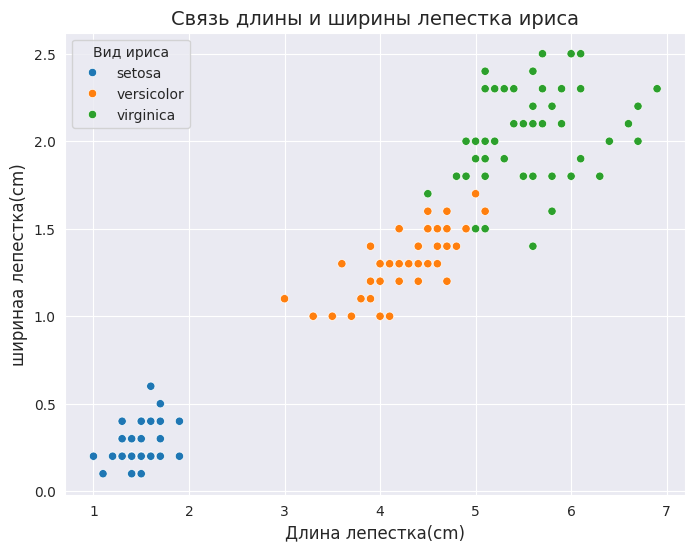

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=iris, x = 'PetalLengthCm', y = 'PetalWidthCm', hue='Species')
plt.title("Связь длины и ширины лепестка ириса",fontsize=14)
plt.xlabel('Длина лепестка(cm)', fontsize=12)
plt.ylabel('ширинаа лепестка(cm)', fontsize=12)
plt.legend(title='Вид ириса')
plt.grid(True)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>Можем сделать следующие выводы из графика:
1. Есть положительная взаимосвязь (корреляция) между длиной лепестка и шириной лепестка во всех
трех видах групп, то есть с увеличением длины лепестка увеличивается и его ширина
2. Так как мы дополнительно использовали параметр hue то можем видеть раздельно длины и ширины лепестков
в трех разных группах и можно видеть, что среднее значение параметров в разных группах - различно.
В iris-virginica наибольшее значения длины и ширины лепестка, в то время как в  iris-setosa -
наименьшее

Чего не хватает графику:
1. Тренда или регрессионной прямой, по направлению которой можно было бы судить о взаимосвязи
длины и ширины лепестка
2. сделать более мелким масштаб осей как по оси длина лепестка так и по оси ширина лепестка</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

In [ ]:
#TODO

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

In [ ]:
# TODO

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

In [ ]:
# TODO

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

In [ ]:
# TODO

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>